<a href="https://colab.research.google.com/github/Ksenya-Tuboltseva/Python_pandas/blob/main/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%BD%D0%B5%D0%B4%D0%B2%D0%B8%D0%B6%D0%B8%D0%BC%D0%BE%D1%81%D1%82%D0%B8_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###1.1. Открыть данные с источника https://www.kaggle.com/datasets/ionaskel/laptop-prices


In [ ]:
import pandas as pd
df = pd.read_csv("/content/kc_final.csv")
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


###1.2 Изучение стоимости недвижимости

Text(0.5, 1.0, 'Cтоимость домов')

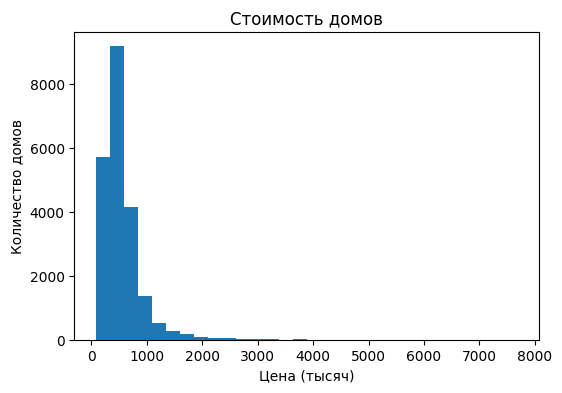

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.hist(df["price"]/1000, bins=30)
plt.xlabel("Цена (тысяч)")
plt.ylabel("Количество домов")
plt.title("Cтоимость домов")

По графику выше можно сделать вывод о том, что наибольшее количество домов находится в диапазоне цен от 250тыс до 750тыс, наименьшее число встречаемых домов приходится на стоимость от 2500тыс до 4000тыс.

###1.3 Изучение распределения квадратуры жилой

Text(0.5, 1.0, 'Жилая площадь домов')

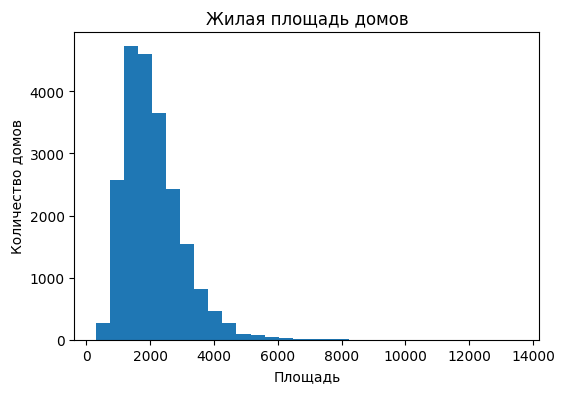

In [ ]:
plt.figure(figsize=(6,4))
plt.hist(df["sqft_living"], bins=30)
plt.xlabel("Площадь")
plt.ylabel("Количество домов")
plt.title("Жилая площадь домов")

По получившемуся графику можно сделать вывод, что самое большое количество построек имеют площадь от 1500 до 2500, наиболее редко встречается площадь более 6000.

###1.4 Изучение распределения года постройки

Text(0.5, 1.0, 'Год постройки домов')

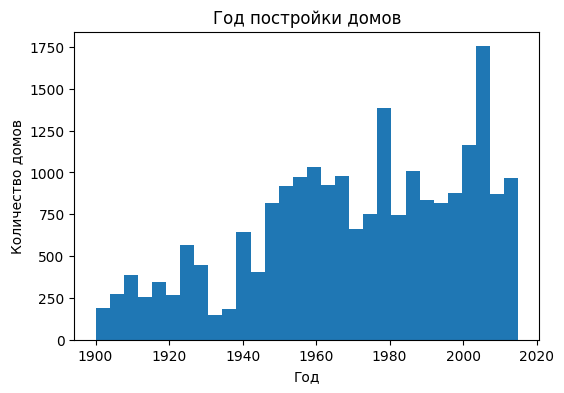

In [ ]:
plt.figure(figsize=(6,4))
plt.hist(df["yr_built"], bins=30)
plt.xlabel("Год")
plt.ylabel("Количество домов")
plt.title("Год постройки домов")

В полученных данных доля новых домов выше доли старых: больше всего домов 2008 года строения, меньше всего - 1920.

###2.1 Изучение распределения домов от наличия вида на набережную


Text(0.5, 1.0, 'Наличие вида на набережную')

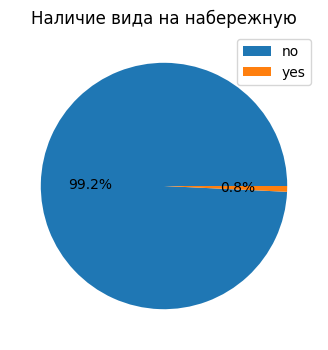

In [ ]:
data = df["waterfront"].value_counts()
data.index = ["no", "yes"]

plt.figure(figsize=(6,4))
plt.pie(data, autopct="%1.1f%%")
plt.legend(data.index)
plt.title("Наличие вида на набережную")

Как следует из графика выше дома с видом на набережную составляют всего 0.8% от всей доли выборки.

###2.2 Изучение распределения этажей домов

Text(0.5, 1.0, 'Распределение количества этажей в домах')

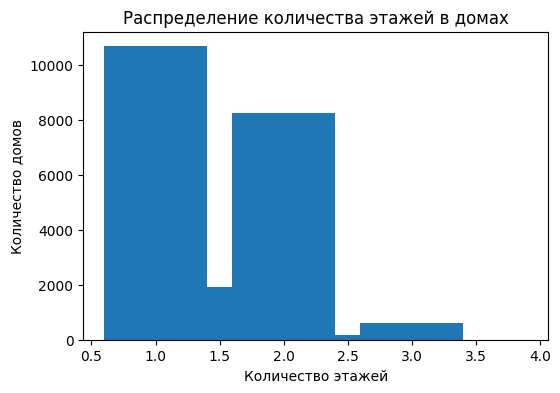

In [ ]:
data = df["floors"].value_counts().reset_index()

plt.figure(figsize=(6,4))
plt.bar(data["index"], data["floors"])
plt.xlabel("Количество этажей")
plt.ylabel("Количество домов")
plt.title("Распределение количества этажей в домах")

Из графика выше делаем вывод, что наиболее часто представлены дома с 1-им (более 10000 строений) или 2-умя (8000 строений) этажами. наиболее редко - 2.5(?) этажа.

###2.3 Изучение распределения состояния домов

Text(0.5, 1.0, 'Распределение состояния домов')

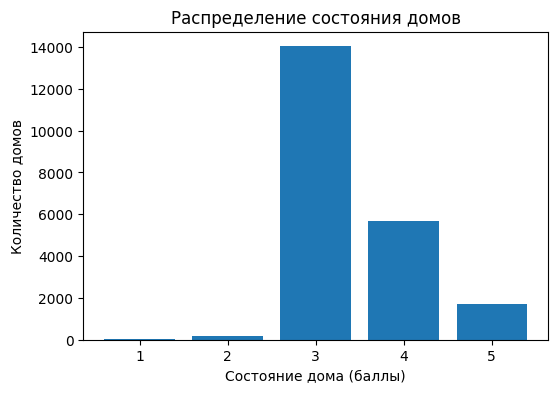

In [ ]:
data_condition = df["condition"].value_counts().reset_index()

plt.figure(figsize=(6,4))
plt.bar(data_condition["index"], data_condition["condition"])
plt.xlabel("Состояние дома (баллы)")
plt.ylabel("Количество домов")
plt.title("Распределение состояния домов")

Система оценивания состояния домов представлена в виде бальной системы от 1 до 5. Больше половины строений относится к средней оценке в 3 балла, наименьшая часть имеет низшую оценку в 1 балл.

##3. Исследование, какие характеристики недвижимости влияют на стоимость недвижимости

Text(0.5, 1.0, 'Зависимость стоимости дома от его цены')

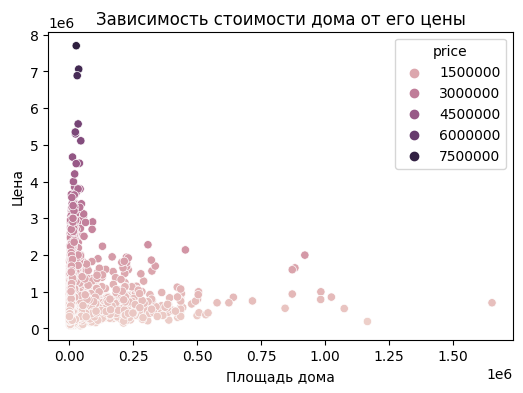

In [ ]:
import seaborn as sns

plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x = "sqft_lot", y = "price", hue = "price")
plt.xlabel("Площадь дома")
plt.ylabel("Цена")
plt.title("Зависимость стоимости дома от его цены")

По первому графику изучения корреляции цены дома от его признаков можем сделать вывод о том, что прямой взаимосвязи между площадью дома и его ценой нет. Скорее всего, стоимость квадрата площади зависит от других факторов: расположения, состояния и тд.

Text(0.5, 1.0, 'Зависимость цены дома от его оценки')

<Figure size 600x400 with 0 Axes>

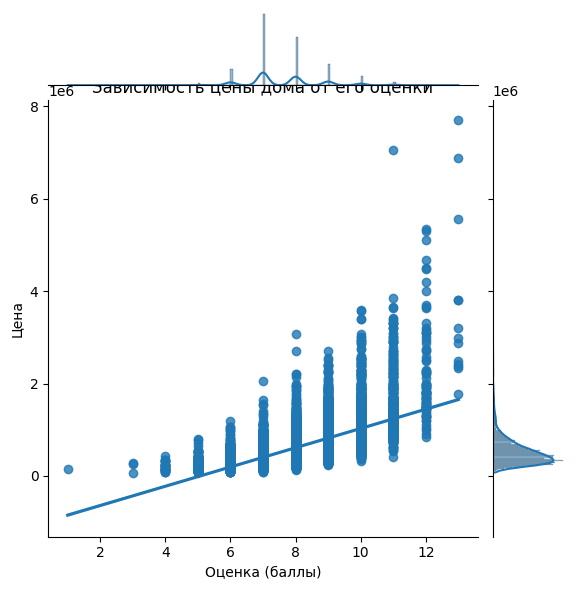

In [ ]:
plt.figure(figsize=(6,4))
sns.jointplot(x=df["grade"], y=df["price"], kind="reg")
plt.xlabel("Оценка (баллы)")
plt.ylabel("Цена")
plt.title("Зависимость цены дома от его оценки")

При сравнении цен по признаку оценки дома можно увидеть прямую пропорциональность: чем выше оценка дома по бальной шкале, тем выше стоимость дома. При этом дома с оценкой от 1 до 3 имеют примерно одинаковую цену.

Text(0.5, 1.0, 'Зависимость стоимости дома от состояния')

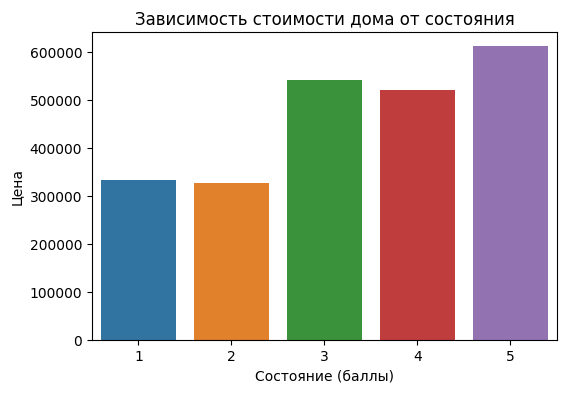

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(data=df, x = "condition", y = "price", errorbar = None)
plt.xlabel("Состояние (баллы)")
plt.ylabel("Цена")
plt.title("Зависимость стоимости дома от состояния")

При разборе графика с оценкой состояния дома линейная прогрессия, в отличие от предыдущего варианта, не прослеживается. Стоимость домов с оценкой 1 выше, чем у домов с оценкой 2, а с оценкой 3 выше, чем у домов с оценкой 4. Высшая оценка соответствует высшей цене.

Text(0.5, 1.0, 'Зависимость цены дома от года постройки')

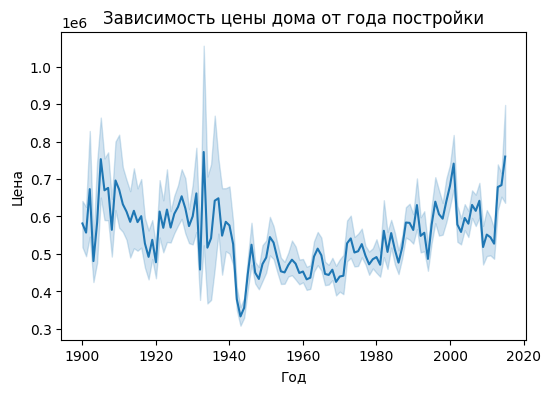

In [ ]:
plt.figure(figsize=(6,4))
sns.lineplot(data=df, x = "yr_built", y = "price")
plt.xlabel("Год")
plt.ylabel("Цена")
plt.title("Зависимость цены дома от года постройки")

При изучении года постройки дома четкой зависимости не отличается, есть несколько пиков стоимости для домов 1902, 1930, 2000 и 2012 годов и один провал для построек 1941 года. Возможно, следует изучить также взаимосвязь с наличием/отсутствием реиновации.

Text(0.5, 1.0, 'Зависимость стоимости дома от вида')

<Figure size 600x400 with 0 Axes>

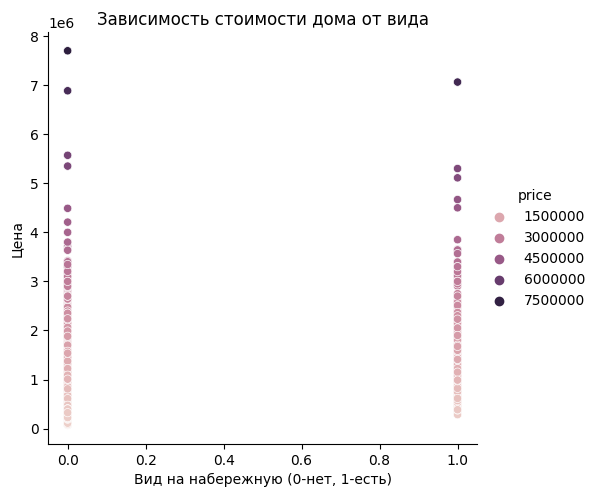

In [ ]:
plt.figure(figsize=(6,4))
sns.relplot(data=df, x = "waterfront", y = "price", hue ="price")
plt.xlabel("Вид на набережную (0-нет, 1-есть)")
plt.ylabel("Цена")
plt.title("Зависимость стоимости дома от вида")


Из последнего графика следует вывода, что прямой связи между видом на набережную и его отсутствием нет. Но также можно отметить, что минимальная стоимость домов с видом на набережную выше, а среди домов без вида на набережную встречается самый дорогой экземпляр.